In [7]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

root = '/Users/rainbow/workingLabs/Dive-into-DL-PyTorch/data/mnist'
# 定义转换器，将数据转换为PyTorch张量
transform = transforms.Compose([transforms.ToTensor()])

# 下载训练数据
train_data = datasets.MNIST(root=root, train=True, download=True, transform=transform)

# 下载测试数据
test_data = datasets.MNIST(root=root, train=False, download=True, transform=transform)

5 torch.Size([1, 28, 28])


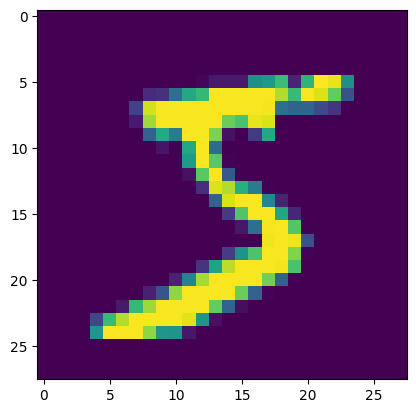

In [8]:
img_test = train_data[0][0]
plt.imshow(img_test.squeeze())
print(train_data[0][1], img_test.size())

In [9]:
num_input = 28 * 28

In [10]:
from torch import nn
import torch.optim as optim
net = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
# output size = ((input_size - kernel_size + 2 * padding) / stride) + 1
                    # = 28
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    # = 14
                    nn.Dropout(0.1),
                    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                    # = 14
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    # = 7
                    nn.Dropout(0.1),
                    nn.Flatten(),
                    nn.Linear(64 * 7 * 7, 128),
                    nn.Sigmoid(),
                    nn.Dropout(0.5),
                    nn.Linear(128, 10),
                    nn.LogSoftmax(dim=1)
                )
optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.0001)
loss = nn.CrossEntropyLoss()

In [11]:
import torch.utils.data as Data
data_iter = Data.DataLoader(dataset=train_data, batch_size=32, shuffle=True)
for X, y in data_iter:
    print(X, y)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [12]:
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print(f'epoch{epoch}, loss={l.item()}')

epoch1, loss=0.4672323763370514
epoch2, loss=0.29077374935150146
epoch3, loss=0.058506254106760025
epoch4, loss=0.10998646169900894
epoch5, loss=0.021304773166775703
epoch6, loss=0.03827250748872757
epoch7, loss=0.02150319330394268
epoch8, loss=0.02454886958003044
epoch9, loss=0.04917215183377266
epoch10, loss=0.017947619780898094


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import numpy as np

# 将数据加载为批次
test_loader = Data.DataLoader(dataset=test_data, batch_size=32, shuffle=False)

# 使用模型进行预测
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in test_loader:
        outputs = net(X)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(y.numpy())

# 计算准确率
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算精确度、召回率和F1分数
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')


Accuracy: 0.9799
Confusion Matrix:
[[ 971    0    2    0    1    0    1    0    4    1]
 [   0 1124    2    2    0    2    1    1    3    0]
 [   2    1 1002    7    1    0    2   10    7    0]
 [   1    0    1  993    0    6    0    4    4    1]
 [   1    1    2    0  964    0    3    2    3    6]
 [   1    0    0    8    0  876    3    1    2    1]
 [   4    2    0    0    3    5  941    0    3    0]
 [   1    1   10    1    0    0    0 1012    1    2]
 [   6    1    2    4    2    4    1    2  947    5]
 [   2    4    0    5    6    7    0    9    7  969]]
Precision: 0.9799507377138188, Recall: 0.9799, F1 Score: 0.9798953496362685


In [14]:
for X, y in data_iter:
    y_hat = net(X)
    _, pre = torch.max(y_hat, 1)
    print(f'{y}\n{pre}\n{y_hat.size()}')
    break

tensor([9, 7, 9, 8, 1, 0, 4, 6, 9, 2, 7, 5, 6, 9, 5, 3, 9, 5, 9, 0, 3, 9, 5, 4,
        2, 8, 4, 1, 8, 6, 0, 8])
tensor([9, 7, 9, 8, 1, 0, 4, 6, 9, 2, 7, 5, 6, 9, 5, 3, 9, 5, 9, 0, 3, 9, 5, 4,
        2, 8, 4, 1, 8, 6, 0, 8])
torch.Size([32, 10])
